In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

In [69]:
long_put = lambda p, st, k: max(k - st, 0) - p
short_put = lambda p, st, k: p - max(k - st, 0)

long_call = lambda p, st, k: max(st - k, 0) - p
short_call = lambda p, st, k: p - max(st - k, 0)

long_put = np.vectorize(long_put)
short_put = np.vectorize(short_put)
long_call = np.vectorize(long_call)
short_call = np.vectorize(short_call)

# Butterfly Spread with Puts

If we have **Put** positions on $K_1$, $K_2$ and $K_3$, such that $K_2 = \frac{K_1 + K_3}{2}$. Then, the butterfly spread is created by taking:

   - 1 long position on $K_1$
   - 2 short positions on $K_2$
   - 1 long position on $K_3$

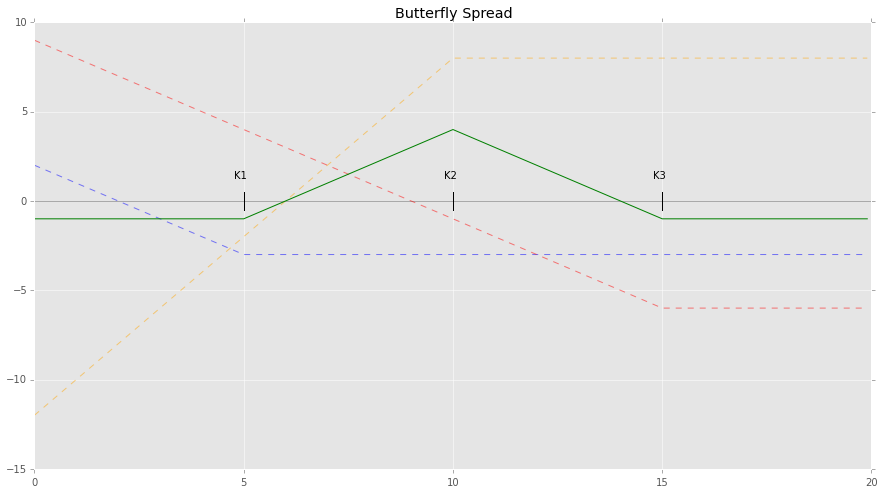

In [50]:
st = np.arange(0, 20, 0.1)
p = 3
strike1 = 5
strike2 = 10
strike3 = 15
k1 = long_put(p, st, strike1)
k2 = 2*short_put(p+1, st, strike2)
k3 = long_put(p+3, st, strike3)
butterfly_spread = k1 + k2 + k3

plt.figure(figsize = (15, 8))
plt.axhline(y = 0, xmin = 0, xmax = 20, alpha = 0.3, color = "black")
plt.title("Butterfly Spread")

# Plotting position at k1
plt.plot([strike1, strike1], [-0.5, 0.5], "k-")
plt.annotate("K1", (strike1-0.2, 1.3))
plt.plot(st, k1, color = "blue", ls = "--", alpha = 0.5)

# Plotting position at k2
plt.plot([strike2, strike2], [-0.5, 0.5], "k-")
plt.annotate("K2", (strike2-0.2, 1.3))
plt.plot(st, k2, color = "orange", ls = "--", alpha = 0.5)

# Plotting position at k3
plt.plot([strike3, strike3], [-0.5, 0.5], "k-")
plt.annotate("K3", (strike3-0.2, 1.3))
plt.plot(st, k3, color = "red", ls = "--", alpha = 0.5)

# Plotting Butterfly Spread
plt.plot(st, butterfly_spread, color = "green");

# Put Bear Spread

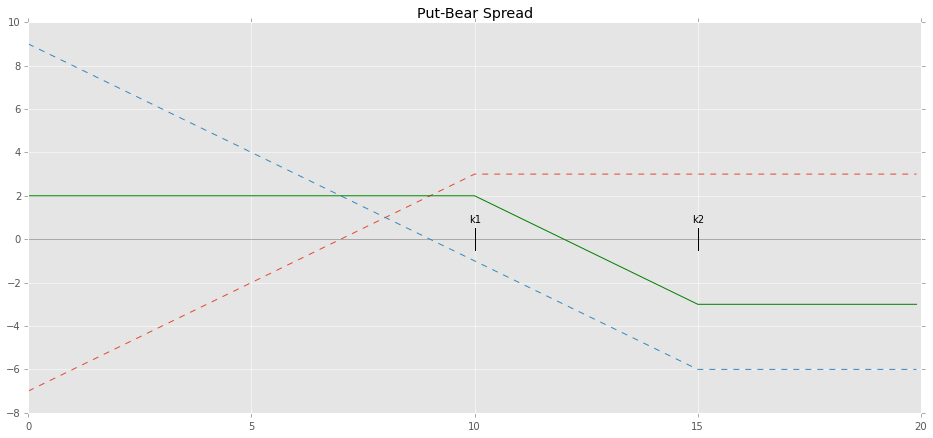

In [51]:
bvp = 5
strike1 = 10
strike2 = 15


k1 = short_put(p, st, strike1)
k2 = long_put(p+3, st, strike2)
bear_spread = k1 + k2

plt.figure(figsize = (16,7))
plt.axhline(y = 0, color = "black", alpha = 0.3)

# Plotting position on k1
plt.plot([strike1, strike1], [-0.5, 0.5], "k-");
plt.annotate("k1", (strike1 - 0.1, 0.8))
plt.plot(st, k1, ls = "--")

# Plotting position on k2
plt.plot([strike2, strike2], [-0.5, 0.5], "k-")
plt.annotate("k2", (strike2 - 0.1, 0.8))
plt.plot(st, k2, ls = "--")

# Plotting bear spread
plt.plot(st, bear_spread, color = "green")

plt.title("Put-Bear Spread");

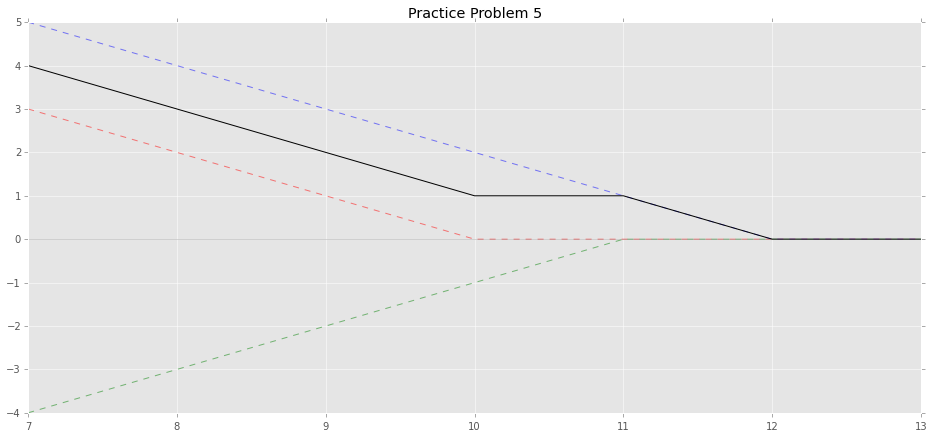

In [56]:
plt.figure(figsize=(16, 7))
k1, k2, k3 = 10, 12, (k1+k2)/2
p = 0
s = np.arange(7, 14, 1)

long1 = long_put(p, s, k1)
long2 = long_put(p, s, k2)
short1 = short_put(p, s, k3)

payoff = (long1 + long2) +  short1 

plt.plot(s, long1, "k--", color = "red", alpha = 0.5)
plt.plot(s, long2, "k--", color = "blue", alpha = 0.5)
plt.plot(s, short1, "k--", color = "green", alpha = 0.5)
plt.plot(s, payoff, color = "black")
plt.axhline(y = 0, color = "gray", alpha = 0.3)
plt.title("Practice Problem 5");

# Problem 5

**Consider two European call options on the same underlying and with the same maturity, but with different strike prices: $K_1$ and  $K_2$, respectively. Suppose that $K_2 > K_1$; you write a call with strike price $K_2$, buy a call with strike price $K_1$, and deposit $K_2 - K_1$ in the bank**

You final payoff is:

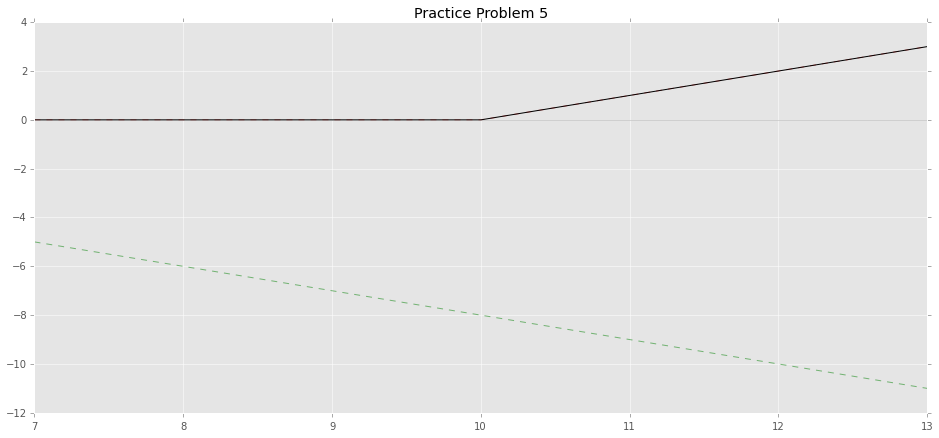

In [87]:
plt.figure(figsize=(16, 7))
k1, k2, k3 = 10, 12, (k2-k1)
p = 0
s = np.arange(7, 14, 1)

long1 = long_call(p, s, k1)
short1 = short_call(p, s, k3)

payoff = long1 

plt.plot(s, long1, "k--", color = "red", alpha = 0.5)
plt.plot(s, short1, "k--", color = "green", alpha = 0.5)
plt.plot(s, payoff, color = "black")
plt.axhline(y = 0, color = "gray", alpha = 0.3)
plt.title("Practice Problem 5");